## **Part A: Conceptual Questions**


**1. What is a Decision Tree and how does it make decisions?**

A Decision Tree is a machine learning model that makes decisions by asking a series of yes/No questions about the data.
It starts from a root node, splits the data based on features values, and continues until it reaches a leaf node, which gives the final prediction (class or value).

**2. What does a split criterion mean in a Decision Tree?**

A split criterion is the rule used to decide which feature and value should be used to split the data at each node.
The goal of a split is to separate data into purer groups, meaning each group contains mostly one clss.
Common split criteria:
- Gini Impurity - This criterion measures how impure a node is. The lower the Gini Impurity the better the feature splits the data inti distinct categories.
- Entropy(Information Gain) - This criterion measures the amount of uncertainity or disorder in the data. The tree tries to reduce the entropy by splitting the data on features that provide the most information about the target variable.


**3. Difference between Gini Impurity and Entropy**

- Gini Impurity measures the probability of incorrect classification of a randomly chosen data point, while Entropy measures the level of uncertainty or disorder in the data.

- Gini Impurity values range from 0 to 0.5 for binary classification, whereas Entropy values range from 0 to 1.

- Gini Impurity is computationally simpler and faster to calculate, while Entropy requires logarithmic calculations and is slightly slower.

- Gini Impurity tries to reduce misclassification, whereas Entropy focuses on maximizing information gain by reducing uncertainty.

- Gini Impurity is commonly used in the CART algorithm and is the default criterion in scikit-learn, while Entropy is used in ID3 and C4.5 algorithms.

- Gini Impurity often produces more balanced splits, whereas Entropy can produce more informative but sometimes uneven splits.

- In practical applications, both Gini Impurity and Entropy usually give very similar results and choosing one over the other rarely changes performance.

**4. Why do Decision Trees tend to overfit?**

Decision Trees can keep splitting until they perfectly fit the training data, even learning noise or small details.

Reasons:

- Too many splits

- Very deep trees

- Small datasets

**5. What role does the max_depth parameter play?**

max_depth controls how deep the tree can grow.
- Small max_depth -> Simple tree -> May underfit.
- Large max_depth -> Complex tree -> May overfit.

## **Part B: Data Exploration**

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.shape

(1025, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
target_col = df['target']
feature_cols = df.drop('target',axis=1)

In [9]:
print("Target Column:",target_col)
print("Feature Columns:",feature_cols)

Target Column: 0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64
Feature Columns:       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        

In [10]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


## **Part C: Data Preprocessing**


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('target',axis=1)
y = df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

## **Part D: Model Building**

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt

DecisionTreeClassifier(random_state=42)

In [19]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

 ## **Part E: Model Evaluation**


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc)

accuracy: 0.9853658536585366


In [23]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n", cm)

confusion matrix:
 [[102   0]
 [  3 100]]


In [24]:
report = classification_report(y_test, y_pred)
print("classification report:\n", report)

classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



**Which class is predicted better?**

- Both classes are predicted almost equally well since their F1-scores are the same (0.99).
- However, Class 0 is predicted slightly better because it has perfect recall (1.00), meaning all actual class-0 samples are correctly identified.

**Is the model overfitting or underfitting?**

- The model is likely overfitting slightly, especially if the training accuracy is 100% or much higher than test accuracy.
- It is not underfitting, because the model performs very well on the test data.

**Part F: Understanding Tree Depth (Manual Experiment)**

In [25]:
depths = [2, 5, None]
for d in depths:
  model = DecisionTreeClassifier(max_depth = d, random_state = 42)
  model.fit(X_train, y_train)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)
  train_acc = accuracy_score(y_train, train_pred)
  test_acc = accuracy_score(y_test, test_pred)
  print("Depth:",d)
  print("Train Accuracy:", train_acc)
  print("Test Accuracy:", test_acc)

Depth: 2
Train Accuracy: 0.7695121951219512
Test Accuracy: 0.6780487804878049
Depth: 5
Train Accuracy: 0.9292682926829269
Test Accuracy: 0.8439024390243902
Depth: None
Train Accuracy: 1.0
Test Accuracy: 0.9853658536585366


**1. What happens when the tree is very shallow?**

- The tree makes very few splits
- Cannot capture complex patterns
- Training accuracy is low
- Testing accuracy is also low

This is called as underfitting(max_depth=2)

**2. What happens when the tree is very deep?**

- The tree keeps splitting until it memorizes the data
- Training accuracy becomes very high
- Testing accuracy may drop or stay slightly lower

This is called Overfitting(max_depth = None)

**3. Which model performs best and why?**

max_depth=5 performs best because:
- It balances bias and variance
- Training and testing accuracies are high
- It generalizes well on unseen data

## **Part G: Tree Visualization**


In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

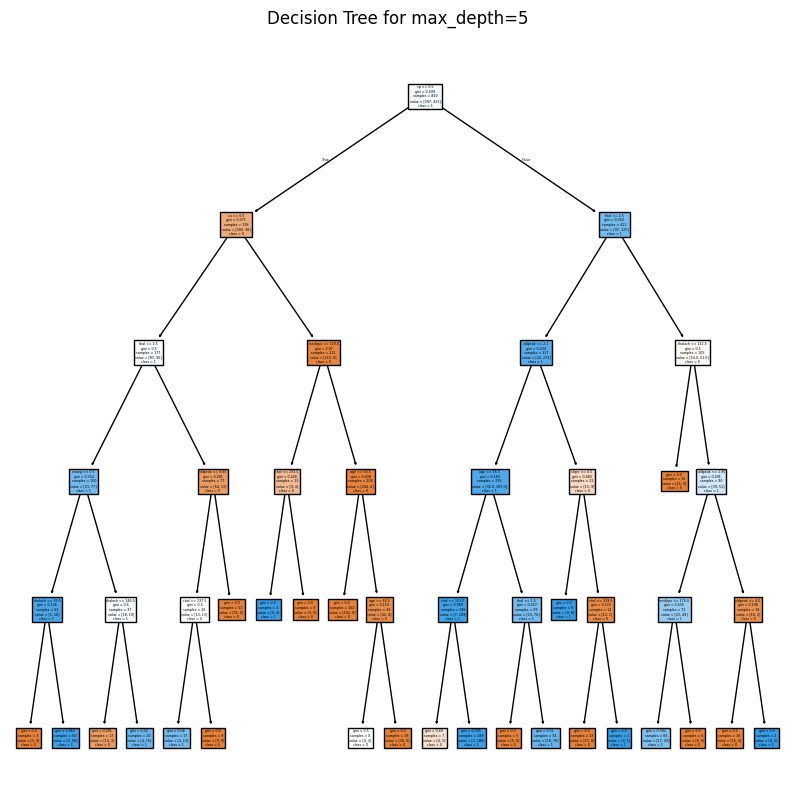

In [27]:
model1 = DecisionTreeClassifier(max_depth =5, random_state=42)
model1.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(model1, feature_names=X.columns, class_names=['0','1'], filled=True)
plt.title("Decision Tree for max_depth=5")
plt.show()

## **Part H: Reflection Questions**



**1. Why are Decision Trees suitable for medical datasets?**

- Decision Trees are suitable for medical datasets because they can handle both numerical amd categorical data, clearly show how decisions are made.
- They help doctors understand which medical factors influence a diagnosis.


**2. What makes Decision Trees easy to interpret?**

Decision trees are easy to interpret because they follow a if-else rule structure, similar to human decision-making.

**3. Why are Decision Trees commonly used in ensemble methods?**

- Decision trees are commonly used in ensemble methods because they are simple, fast to train, and can be combined to improve performance.
- When many trees are used together, they reduce overfitting and increase prediction accuracy by averaging or combining multiple decision paths.

## **Finally Check with these below parameter**


**Compare criterion='gini' vs criterion='entropy'**



In [28]:
criteria = ['gini', 'entropy']

for c in criteria:
    model = DecisionTreeClassifier(criterion=c,random_state=42)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print("Criterion:", c)
    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)

Criterion: gini
Training Accuracy: 1.0
Testing Accuracy: 0.9853658536585366
Criterion: entropy
Training Accuracy: 1.0
Testing Accuracy: 0.9853658536585366


- Gini is faster to compute and usually gives similar accuracy to entropy.

- Entropy measures information gain and may create slightly more informative splits.

**Trying min_samples_leaf Manually**

min_samples_leaf controls the minimum number of samples required in a leaf node.
Larger values make the tree simpler and more stable.

In [29]:
leaf_sizes = [1, 5, 10]

for leaf in leaf_sizes:
    model = DecisionTreeClassifier(
        criterion='gini',
        min_samples_leaf=leaf,
        random_state=42
    )

    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    print("min_samples_leaf:", leaf)
    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)


min_samples_leaf: 1
Training Accuracy: 1.0
Testing Accuracy: 0.9853658536585366
min_samples_leaf: 5
Training Accuracy: 0.9536585365853658
Testing Accuracy: 0.8975609756097561
min_samples_leaf: 10
Training Accuracy: 0.9219512195121952
Testing Accuracy: 0.8585365853658536


- min_samples_leaf = 1

  - Very high training accuracy

  - Higher risk of overfitting

- min_samples_leaf = 5

  - Balanced training and testing accuracy

  - Better generalization

- min_samples_leaf = 10

  - Simpler tree

  - Slight drop in accuracy → possible underfitting

**Conclusion**

- Both Gini and Entropy give almost identical results; Gini is preferred due to faster computation.

- Increasing min_samples_leaf reduces overfitting by preventing very small leaf nodes.

- A moderate value of min_samples_leaf (e.g., 5) provides the best balance between accuracy and generalization.

- Proper tuning of tree parameters is essential to avoid overfitting, especially in medical datasets.